<a href="https://colab.research.google.com/github/isaacbull/Data-Science-zikspot/blob/main/datascience_apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This notebook explores various machine learning techniques using popular Python libraries such as scikit-learn and TensorFlow/Keras. It demonstrates data visualization with Plotly and Dash, model training with different algorithms (including Gradient Boosting and Neural Networks), and model evaluation through insightful visualizations.

## Description
The notebook utilizes diverse datasets including 'tips', 'iris', and 'cifar10' to showcase the practical application of these techniques. It covers:

Data visualization using Plotly Express and Dash for interactive dashboards.
Model training with Random Forest, Gradient Boosting Regressor, and Sequential Neural Networks.
Model evaluation with metrics, residual plots, confusion matrices, and training history visualizations.
A step-by-step approach to understanding and implementing fundamental machine learning concepts.
This notebook is intended for anyone interested in learning about practical machine learning with Python.

In [3]:
# prompt: install dash

!pip install -q dash


In [11]:
# prompt: install jupyter_dash

!pip install -q jupyter-dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.7 MB/s eta 0:00:00


In [12]:
# prompt: create data and use dash to create dash data visualization with it using tips dataset from

!pip install -q dash
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd

# Load tips dataset
tips = px.data.tips()

# Create a Dash app
app = JupyterDash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("Tips Dataset Visualization"),
    dcc.Dropdown(
        id="x-axis-column",
        options=[{"label": col, "value": col} for col in tips.columns],
        value="total_bill",  # Default value for the x-axis
    ),
    dcc.Graph(id="scatter-plot"),
])

# Define the callback function
@app.callback(
    Output("scatter-plot", "figure"),
    Input("x-axis-column", "value")
)
def update_graph(x_column):
    fig = px.scatter(tips, x=x_column, y="tip", color="smoker")
    return fig

# Run the app
if __name__ == "__main__":
    app.run_server(mode='inline')

/usr/local/lib/python3.10/dist-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# prompt: use streamlit to create a beautiful data science app using iris data

!pip install -q streamlit
!pip install -q plotly
!pip install -q pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.0 MB/s eta 0:00:00


2024-10-25 16:23:27.045 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 16:23:27.112 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-25 16:23:27.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 16:23:27.124 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 16:23:27.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 16:23:27.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 16:23:27.130 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-25 16:23:27.133 Thread 'MainThread': mi

DeltaGenerator()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

iris_df = px.data.iris()
X = iris_df.drop('species', axis=1)
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [18]:
# prompt: use gradient boosting regressor on iris data

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.004347249965518138


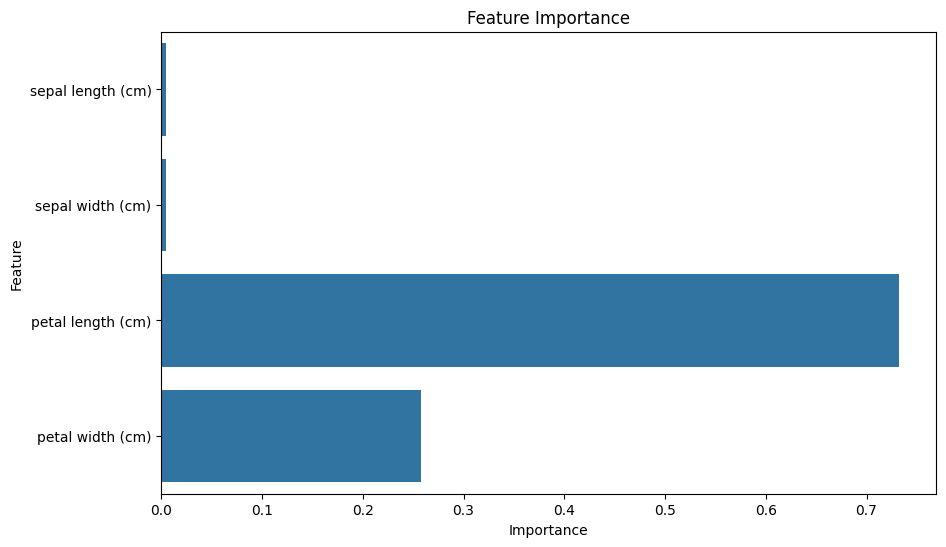

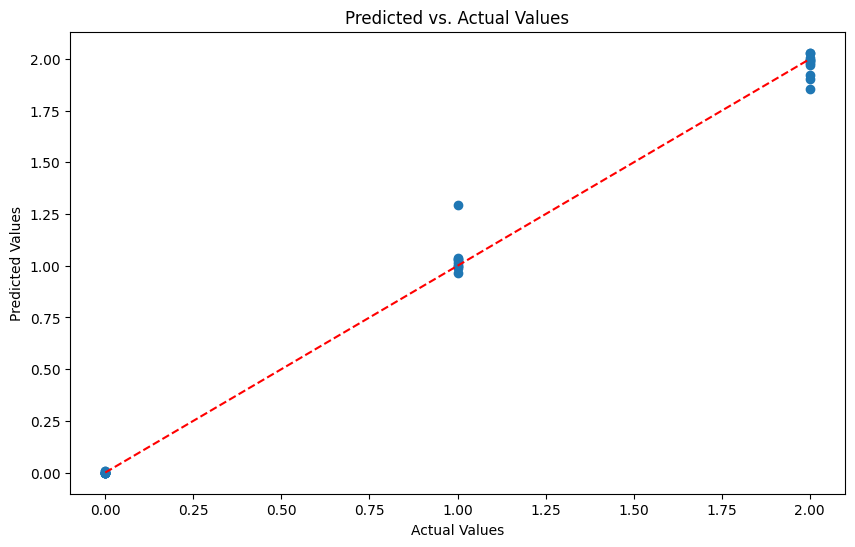

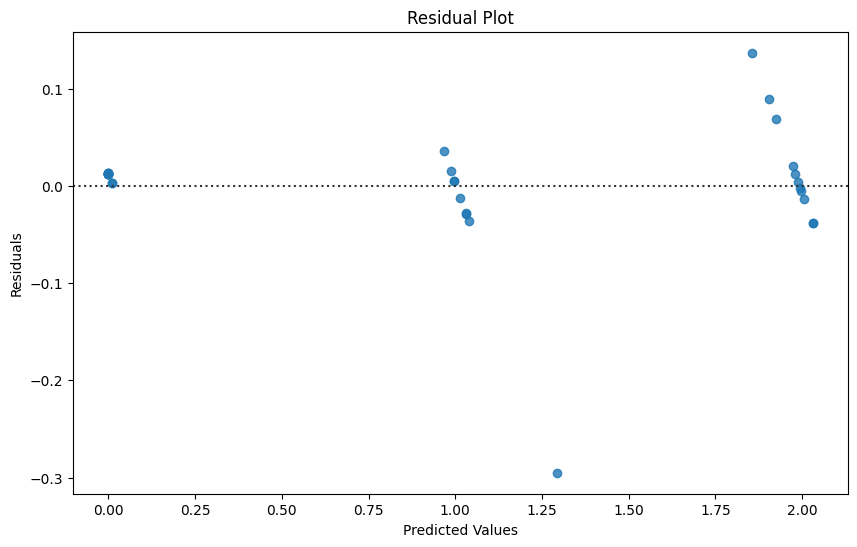

In [19]:
# prompt: plot some graphs to evaluate our gbr model

import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance Plot
feature_importance = gbr.feature_importances_
feature_names = iris.feature_names
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Prediction vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

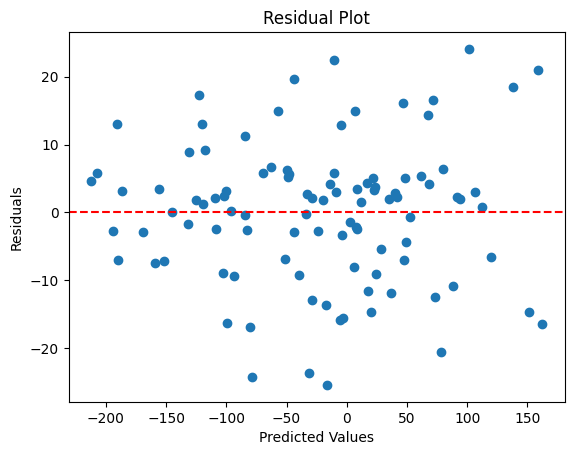

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Create residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [21]:
import tensorflow as tf

# Creating a tensor
tensor = tf.constant([[1, 2, 3], [4, 5, 6]])


In [22]:
a = tf.constant(2)
b = tf.constant(3)
c = a + b


In [26]:
tensor

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a simple feedforward neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [28]:
# prompt: use iris data to train our new sequential model

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert target variable to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=3)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the sequential model
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # Input layer with 4 features
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with 3 classes (one-hot encoded)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3234 - loss: 2.0837
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3191 - loss: 1.7312  
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2905 - loss: 1.4524  
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2964 - loss: 1.1165  
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3384 - loss: 0.9705 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4093 - loss: 0.9503  
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6160 - loss: 0.9437 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6459 - loss: 0.9364  
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6707 - loss: 0.9058 
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6419 - loss: 0.9130 
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6839 - loss: 0.8951 
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accur

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.3121 - loss: 1.0182 - val_accuracy: 0.5000 - val_loss: 0.9038
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3673 - loss: 0.9871 - val_accuracy: 0.7083 - val_loss: 0.9096
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4991 - loss: 0.9699 - val_accuracy: 0.7917 - val_loss: 0.8998
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8053 - loss: 0.9334 - val_accuracy: 0.7500 - val_loss: 0.9042
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8844 - loss: 0.9047 - val_accuracy: 0.7917 - val_loss: 0.8907
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8548 - loss: 0.8886 - val_accuracy: 0.7917 - val_loss: 0.8792
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7898 - loss: 0.8725 - val_accuracy: 0.7500 - val_loss: 0.8657
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8004 - loss: 0.8620 - val_accuracy: 0.7917 - val_lo

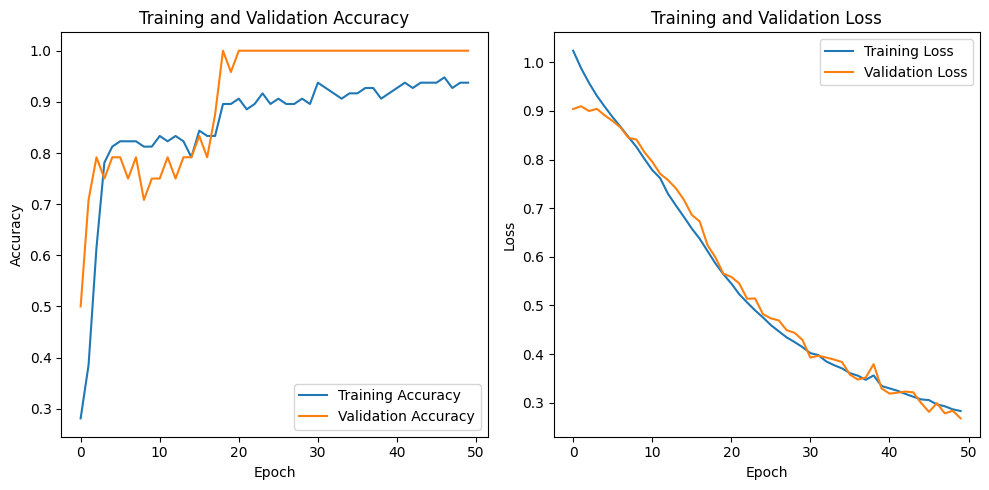

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


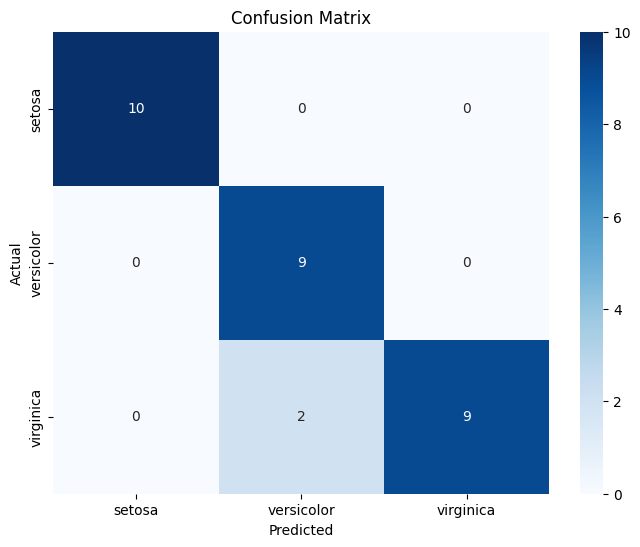

In [30]:
# prompt: use iris data to train our new sequential model and evaluate model with visualizations

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert target variable to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=3)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the sequential model
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # Input layer with 4 features
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with 3 classes (one-hot encoded)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 117ms/step - accuracy: 0.3889 - loss: 1.7106 - val_accuracy: 0.5434 - val_loss: 1.2878
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 119ms/step - accuracy: 0.6116 - loss: 1.1092 - val_accuracy: 0.6456 - val_loss: 1.0153
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 138s 114ms/step - accuracy: 0.6653 - loss: 0.9478 - val_accuracy: 0.6676 - val_loss: 0.9682
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 115ms/step - accuracy: 0.7106 - loss: 0.8242 - val_accuracy: 0.6960 - val_loss: 0.8912
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 86s 121ms/step - accuracy: 0.7361 - loss: 0.7482 - val_accuracy: 0.7116 - val_loss: 0.8601
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - accuracy: 0.7601 - loss: 0.6871 - val_accuracy: 0.6982 - val_loss: 0.9059
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 114ms/step - accuracy: 0.7851 - loss: 0.6191 - val_accuracy: 0.7226 - val_loss: 0.8565
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 114ms/step - accuracy: 0.8066 - loss: 

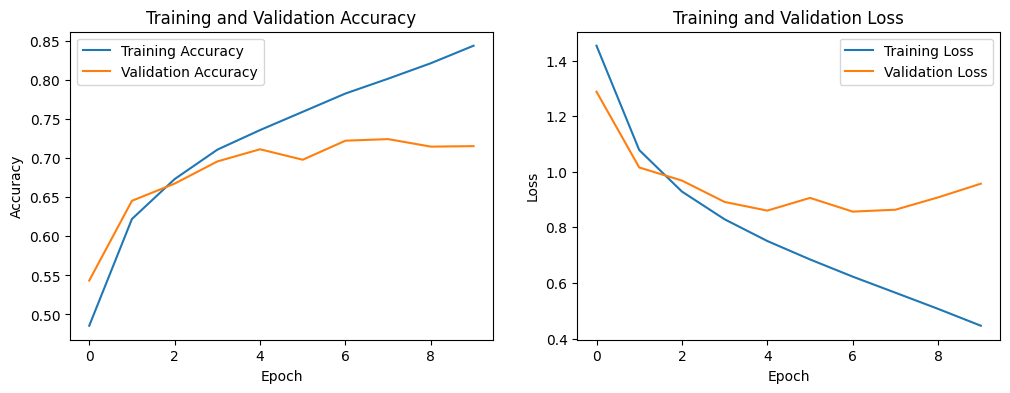

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


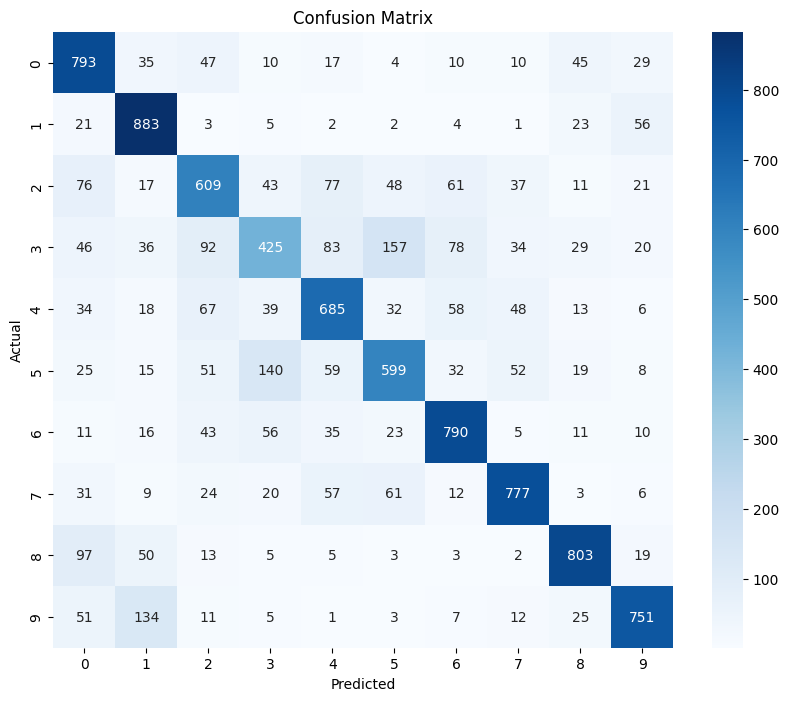

In [31]:
# prompt: use public dataset to train a convolutional neural network and evaluate the model using significant visualizations

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

#Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: print type

print(type(model))